<a href="https://colab.research.google.com/github/Xyron0321/223140209-garcia/blob/main/L2_DM_FINAL_PROJECT_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# --- STEP 1: IMPORTING LIBRARIES ---

# Pandas is used for data manipulation and analysis (handling dataframes)
import pandas as pd

# Numpy is the go-to for numerical operations and handling arrays
import numpy as np

# Matplotlib is the foundation for creating static, interactive, and animated visualizations
import matplotlib.pyplot as plt

# Seaborn is built on top of Matplotlib and provides a high-level interface for attractive statistical graphics
import seaborn as sns

# 're' is the built-in Python module for Regular Expressions (useful for string searching and cleaning)
import re

# Set the default Seaborn aesthetic parameters for all plots (makes them look cleaner)
sns.set()

In [2]:
# --- STEP 2: IMPORTING THE DATASET ---

# The URL where the Hotel Booking Demand dataset is hosted
dataset_url = "https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-02-11/hotels.csv"

# Load the CSV data into a DataFrame named 'df' using pandas
df = pd.read_csv(dataset_url)

# This command shows us the first 5 rows of the table so we can see what we're working with
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
# --- STEP 3: PREPARE THE DATASET ---

# We create 'df_hotels' based on the 'df' we loaded earlier
df_hotels = df.copy()

# Add an 'id' column so every booking has a unique number
df_hotels = df_hotels.reset_index().rename(columns={'index':'id'})

# Show the first few rows to confirm the 'id' column is there
df_hotels.head()

,id,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,0,Resort Hotel,0,342,2015,July,27,1,0,0,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,1,Resort Hotel,0,737,2015,July,27,1,0,0,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,2,Resort Hotel,0,7,2015,July,27,1,0,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,3,Resort Hotel,0,13,2015,July,27,1,0,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,4,Resort Hotel,0,14,2015,July,27,1,0,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
# --- STEP 4: CREATE THE SUMMARY FUNCTION ---

# This function goes through every column and calculates stats
def check_values(df):
    data = []
    for column in df.columns:
      data.append([
                  column,
                  df[column].dtype,
                  df[column].isna().sum(),
                  round(100*(df[column].isna().sum()/len(df)),2),
                  df[column].nunique()
                  ])

    # This turns the results into the clean table you saw in your instructions
    return pd.DataFrame(columns=['Data_Features','Data_Type','Null','Null_Percentage','Unique_Value'], data=data)

# Now we call the function to see the results for df_hotels
check_values(df_hotels)

,Data_Features,Data_Type,Null,Null_Percentage,Unique_Value
0,id,int64,0,0.00,119390
1,hotel,object,0,0.00,2
2,is_canceled,int64,0,0.00,2
3,lead_time,int64,0,0.00,479
4,arrival_date_year,int64,0,0.00,3
5,arrival_date_month,object,0,0.00,12
6,arrival_date_week_number,int64,0,0.00,53
7,arrival_date_day_of_month,int64,0,0.00,31
8,stays_in_weekend_nights,int64,0,0.00,17
9,stays_in_week_nights,int64,0,0.00,35


Cancellation Counts:
is_canceled
0    75166
1    44224
Name: count, dtype: int64

Cancellation Proportions:
is_canceled
0    0.629584
1    0.370416
Name: proportion, dtype: float64


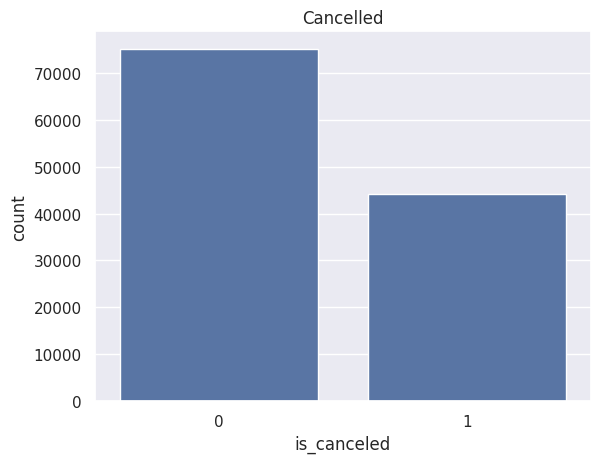

In [5]:
# --- QUESTION 2: COUNTS AND PROPORTIONS ---

# 1. Count the number of visitors who canceled (1) vs those who stayed (0)
print("Cancellation Counts:")
print(df_hotels.is_canceled.value_counts())

# 2. Get the proportions (percentage) of each
print("\nCancellation Proportions:")
print(df_hotels.is_canceled.value_counts(normalize=True))

# 3. Visualization: Create a bar chart (countplot)
sns.countplot(data=df_hotels, x='is_canceled')
plt.title('Cancelled')
plt.show()

In [6]:
# --- QUESTION 3: HOTEL TYPE COMPARISON ---

# a) Percentage of canceled reservations for "City Hotel"
city_cancel = round(100*(len(df_hotels[(df_hotels.hotel=='City Hotel') & (df_hotels.is_canceled==1)])/len(df_hotels[df_hotels.hotel=='City Hotel'])),2)
print(f"City Hotel Cancellation: {city_cancel}%")

# b) Percentage of canceled reservations for "Resort Hotel"
resort_cancel = round(100*(len(df_hotels[(df_hotels.hotel=='Resort Hotel') & (df_hotels.is_canceled==1)])/len(df_hotels[df_hotels.hotel=='Resort Hotel'])),2)
print(f"Resort Hotel Cancellation: {resort_cancel}%")

# Conclusion: City Hotel has the bigger percentage of cancellations at 41.73%

City Hotel Cancellation: 41.73%
Resort Hotel Cancellation: 27.76%


In [7]:
# --- QUESTION 4: FILTERING DATA ---

# Filter data to only display visitors who didn't cancel (is_canceled == 0)
df_checkout = df_hotels[df_hotels.is_canceled == 0]

# Show the first few rows of the new filtered dataframe
df_checkout.head()

,id,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,0,Resort Hotel,0,342,2015,July,27,1,0,0,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,1,Resort Hotel,0,737,2015,July,27,1,0,0,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,2,Resort Hotel,0,7,2015,July,27,1,0,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,3,Resort Hotel,0,13,2015,July,27,1,0,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,4,Resort Hotel,0,14,2015,July,27,1,0,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


Answer for 5a (Counts per month):
hotel         arrival_date_month
City Hotel    April                 4015
              August                5381
              December              2392
              February              3064
              January               2254
              July                  4782
              June                  4366
              March                 4072
              May                   4579
              November              2696
              October               4337
              September             4290
Resort Hotel  April                 2550
              August                3257
              December              2017
              February              2308
              January               1868
              July                  3137
              June                  2038
              March                 2573
              May                   2535
              November              1976
              October          

/tmp/ipython-input-4099679410.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_checkout['arrival_date_month_number'] = df_checkout['arrival_date_month'].map(month_dict)


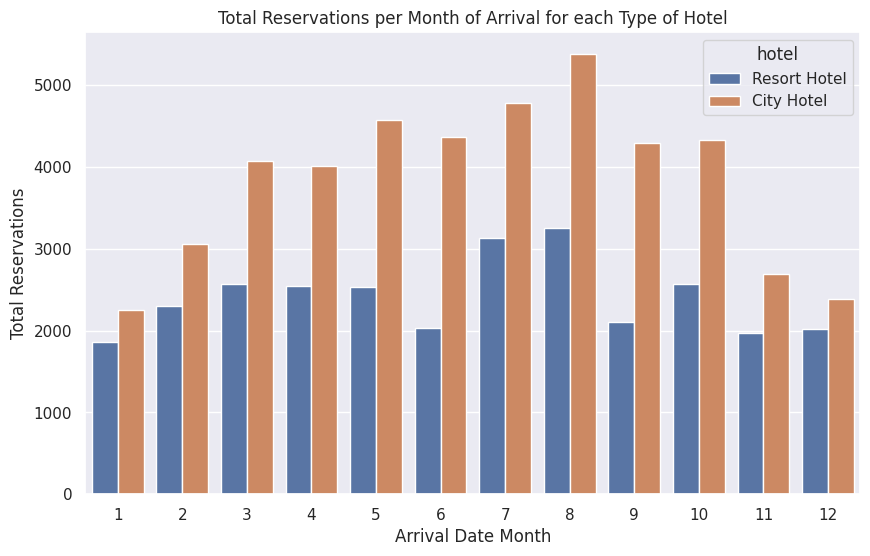

In [8]:
# --- QUESTION 5a: Show reservations per month per hotel ---
# We use groupby to organize the data by hotel and month, then count unique IDs
res_per_month = df_checkout.groupby(['hotel','arrival_date_month'])['id'].nunique()
print("Answer for 5a (Counts per month):")
print(res_per_month)

# --- QUESTION 5c: Mapping months to numbers ---
import calendar
# This dictionary maps 'January' to 1, 'February' to 2, etc.
month_dict = {month: index for index, month in enumerate(calendar.month_name) if month}
df_checkout['arrival_date_month_number'] = df_checkout['arrival_date_month'].map(month_dict)

# --- VISUALIZATION for 5b & 5c ---
plt.figure(figsize=(10,6))
sns.countplot(data=df_checkout, x='arrival_date_month_number', hue='hotel')
plt.xlabel('Arrival Date Month')
plt.ylabel('Total Reservations')
plt.title('Total Reservations per Month of Arrival for each Type of Hotel')
plt.show()

/tmp/ipython-input-1111406227.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_checkout['arrival_date_month_number'] = df_checkout['arrival_date_month'].map(month_dict)


Reservations per Month (Numerical):
hotel         arrival_date_month_number
City Hotel    1                            2254
              2                            3064
              3                            4072
              4                            4015
              5                            4579
              6                            4366
              7                            4782
              8                            5381
              9                            4290
              10                           4337
              11                           2696
              12                           2392
Resort Hotel  1                            1868
              2                            2308
              3                            2573
              4                            2550
              5                            2535
              6                            2038
              7                            3137
            

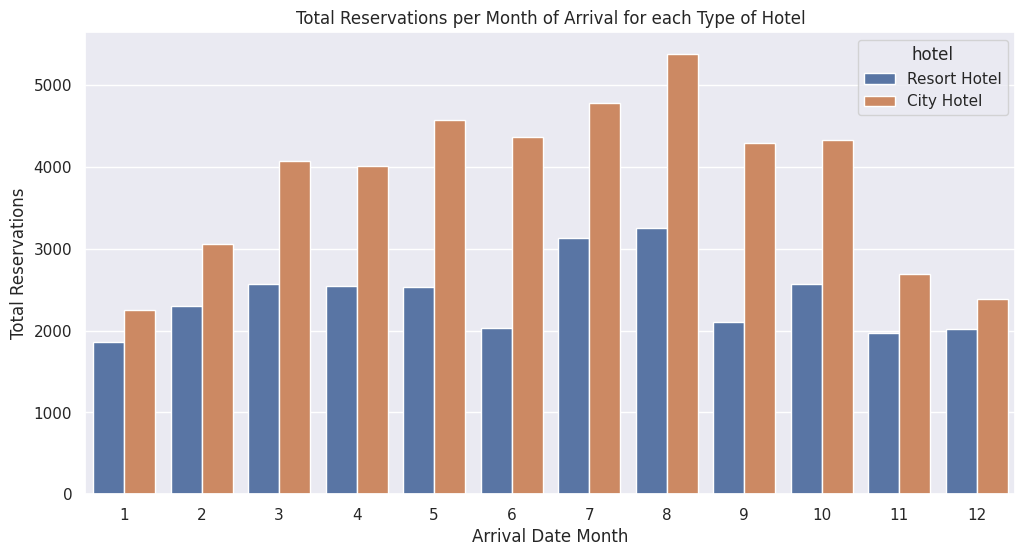

In [9]:
# --- QUESTION 5b & 5c: MAPPING MONTHS AND VISUALIZING ---

import calendar

# c) Create a dictionary to map month names to numbers (January = 1, etc.)
month_dict = {month: index for index, month in enumerate(calendar.month_name) if month}

# Apply the mapping to create a new numerical month column
df_checkout['arrival_date_month_number'] = df_checkout['arrival_date_month'].map(month_dict)

# Show the numerical output (similar to 5a but with numbers)
print("Reservations per Month (Numerical):")
print(df_checkout.groupby(['hotel','arrival_date_month_number'])['id'].nunique())

# b) Create the visualization to confirm the trend
plt.figure(figsize=(12,6))
sns.countplot(data=df_checkout, x='arrival_date_month_number', hue='hotel')
plt.xlabel('Arrival Date Month')
plt.ylabel('Total Reservations')
plt.title('Total Reservations per Month of Arrival for each Type of Hotel')
plt.show()

# Conclusion: Both hotel types peak in August (Month 8) and follow a similar trend.

In [10]:
# --- 6a: Combine year, month, and day into a string ---
# We convert them to 'str' so we can join them with '-'
# We use .str.pad(2,fillchar='0') to make sure '1' becomes '01'
df_checkout['arrival_date'] = \
  df_checkout['arrival_date_year'].astype('str') + '-' +\
  df_checkout.arrival_date_month_number.astype('str').str.pad(2,fillchar='0') + '-' +\
  df_checkout.arrival_date_day_of_month.astype('str').str.pad(2,fillchar='0')

# --- 6b: Convert the string column to a real Datetime type ---
# This allows Python to treat it as a calendar date instead of just text
df_checkout['arrival_date'] = pd.to_datetime(df_checkout.arrival_date)

# This shows your new column and the 'dtype: datetime64' at the bottom
df_checkout['arrival_date']

/tmp/ipython-input-2192788195.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_checkout['arrival_date'] = \
/tmp/ipython-input-2192788195.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_checkout['arrival_date'] = pd.to_datetime(df_checkout.arrival_date)


,arrival_date
0,2015-07-01
1,2015-07-01
2,2015-07-01
3,2015-07-01
4,2015-07-01
...,...
119385,2017-08-30
119386,2017-08-31
119387,2017-08-31
119388,2017-08-31


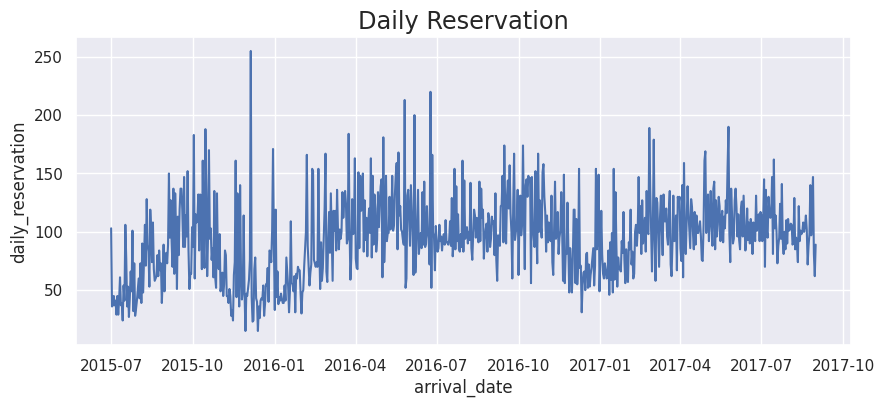

,arrival_date,daily_reservation
0,2015-07-01,103
1,2015-07-02,36
2,2015-07-03,37
3,2015-07-04,45
4,2015-07-05,37


In [11]:
# --- QUESTION 7a: DAILY RESERVATIONS ---

# 1. Create the dataframe by resampling to 'D' (Day) and counting the size
df_daily_reservation = df_checkout.resample('D', on='arrival_date').size().reset_index().rename(columns={0:'daily_reservation'})

# 2. Visualize the daily trend
plt.figure(figsize=(10,4))
sns.lineplot(data=df_daily_reservation, x='arrival_date', y='daily_reservation')
plt.title('Daily Reservation', fontsize='x-large')
plt.show()

# Show the first few rows of the daily data
df_daily_reservation.head()

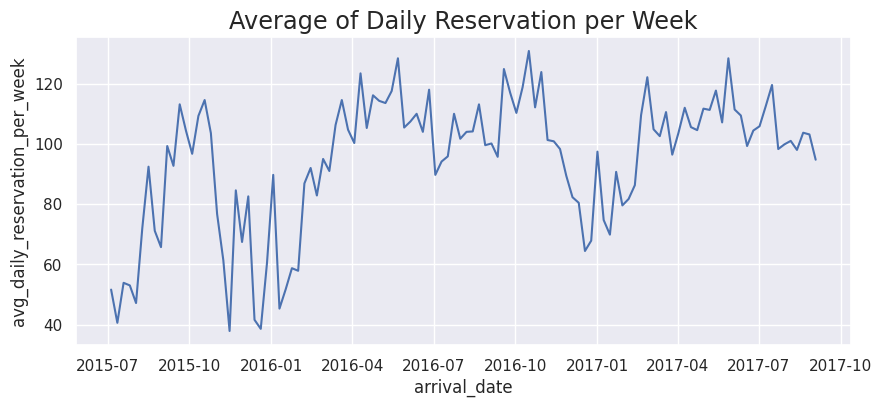

,arrival_date,avg_daily_reservation_per_week
0,2015-07-05,51.60
1,2015-07-12,40.57
2,2015-07-19,53.86
3,2015-07-26,53.00
4,2015-08-02,47.14


In [12]:
# --- QUESTION 7b: WEEKLY AVERAGES ---

# 1. We resample by Day first, then by Week ('W') to find the mean
df_avg_daily_reservation_per_week = round(
    df_checkout.resample('D', on='arrival_date')
    .size()
    .reset_index()
    .rename(columns={0:'avg_daily_reservation_per_week'})
    .resample('W', on='arrival_date')['avg_daily_reservation_per_week']
    .mean()
    .reset_index(),
    2
)

# 2. Visualize the weekly average trend
plt.figure(figsize=(10,4))
sns.lineplot(data=df_avg_daily_reservation_per_week, x='arrival_date', y='avg_daily_reservation_per_week')
plt.title('Average of Daily Reservation per Week', fontsize='x-large')
plt.show()

# Show the results
df_avg_daily_reservation_per_week.head()

In [13]:
# --- QUESTION 8a: CALCULATING MEAN ADR ---

# We group by hotel type and customer type, then find the mean of the 'adr' column
# We round to 2 decimal places for a clean financial look
avg_adr = round(df_checkout.groupby(['hotel','customer_type'])['adr'].mean(),2)

print("Average ADR per Hotel and Customer Type:")
print(avg_adr)

Average ADR per Hotel and Customer Type:
hotel         customer_type  
City Hotel    Contract           108.93
              Group               87.40
              Transient          110.42
              Transient-Party     93.71
Resort Hotel  Contract            78.58
              Group               77.31
              Transient           96.00
              Transient-Party     77.20
Name: adr, dtype: float64


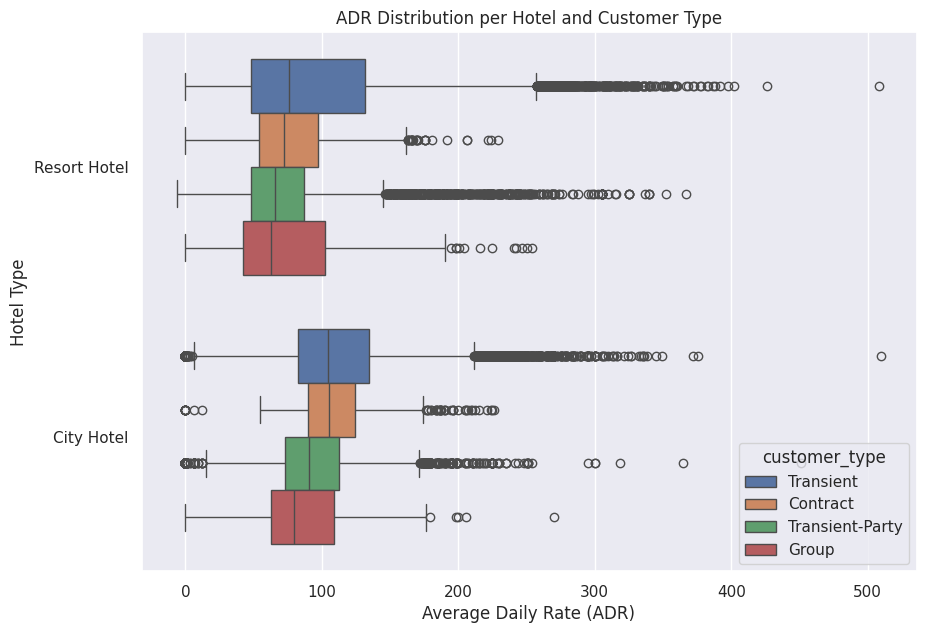

In [14]:
# --- QUESTION 8b: BOXPLOT VISUALIZATION ---

plt.figure(figsize=(10,7))
sns.boxplot(data=df_checkout, x='adr', y='hotel', hue='customer_type')
plt.title('ADR Distribution per Hotel and Customer Type')
plt.xlabel('Average Daily Rate (ADR)')
plt.ylabel('Hotel Type')
plt.show()

In [15]:
# --- QUESTION 9: LOADING AND CLEANING COUNTRY DATA ---

# 1. Load the country code dataset
df_country = pd.read_csv('https://gist.githubusercontent.com/tadast/8827699/raw/f5cac3d42d16b78348610fc4ec301e9234f82821/countries_codes_and_coordinates.csv')

# 2. Clean the 'Alpha-3 code' column to match our hotel data
# We remove double quotes and extra spaces
df_country['code'] = df_country['Alpha-3 code'].str.replace('"','').str.strip()

# 3. Merge df_checkout with df_country
# We join them where 'country' from the hotel data matches 'code' from the country data
df_merged = pd.merge(df_checkout[['id','country']],
                     df_country[['Country','code']],
                     left_on='country',
                     right_on='code',
                     indicator=True,
                     how='left')

# Check the first few rows of the merged data
df_merged.head()

,id,country,Country,code,_merge
0,0,PRT,Portugal,PRT,both
1,1,PRT,Portugal,PRT,both
2,2,GBR,United Kingdom,GBR,both
3,3,GBR,United Kingdom,GBR,both
4,4,GBR,United Kingdom,GBR,both


Top 10 Countries with Largest Number of Reservations:
Country
Portugal          21071
United Kingdom     9676
France             8481
Spain              6391
Germany            6069
Ireland            2543
Italy              2433
Belgium            1868
Netherlands        1717
United States      1596
Name: count, dtype: int64


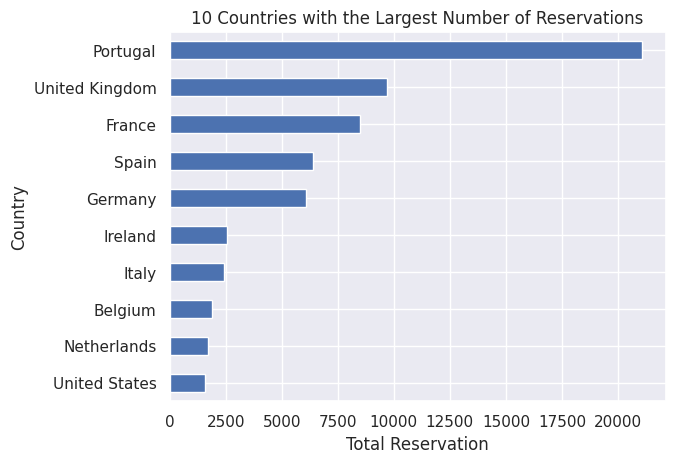

In [16]:
# --- QUESTION 9: TOP 10 COUNTRIES ---

# 1. Display the top 10 countries as a list
print("Top 10 Countries with Largest Number of Reservations:")
print(df_merged.Country.value_counts().head(10))

# 2. Create a Horizontal Bar Chart
# We sort values ascending so the largest country appears at the top of the bar chart
df_merged.Country.value_counts().head(10).sort_values(ascending=True).plot.barh()
plt.xlabel('Total Reservation')
plt.ylabel('Country')
plt.title('10 Countries with the Largest Number of Reservations')
plt.show()

In [17]:
# --- QUESTION 10a: CALCULATING TOTAL AND AVERAGE GUESTS ---

# 1. Create a new column 'total_guest' by summing adults, children, and babies
df_checkout['total_guest'] = df_checkout.adults + df_checkout.children + df_checkout.babies

# 2. Calculate the mean and round it to 0 (since you can't have a fraction of a person)
avg_guests = round(df_checkout.total_guest.mean(), 0)

print(f"The average number of guests per reservation is: {avg_guests}")

The average number of guests per reservation is: 2.0


/tmp/ipython-input-1554105356.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_checkout['total_guest'] = df_checkout.adults + df_checkout.children + df_checkout.babies


In [19]:
# --- QUESTION 10b: HIGHEST NUMBER OF GUESTS ---

# 1. Find the highest number of guests in a single reservation
max_guests = df_checkout.total_guest.max()
print(f"Highest number of guests: {max_guests}")

# 2. Show the reservation data for that specific row
# We use .T to flip the data vertically so it is easier to read all column values
df_checkout[df_checkout.total_guest == max_guests].T

Highest number of guests: 12.0


,46619
id,46619
hotel,City Hotel
is_canceled,0
lead_time,37
arrival_date_year,2016
arrival_date_month,January
arrival_date_week_number,3
arrival_date_day_of_month,12
stays_in_weekend_nights,0
stays_in_week_nights,2


In [22]:
# 1. We look inside df_checkout
# 2. We find rows where total_guest equals the maximum value (12)
# 3. We add .T at the end to flip it for "easy reading"
df_checkout[df_checkout.total_guest == df_checkout.total_guest.max()].T

,46619
id,46619
hotel,City Hotel
is_canceled,0
lead_time,37
arrival_date_year,2016
arrival_date_month,January
arrival_date_week_number,3
arrival_date_day_of_month,12
stays_in_weekend_nights,0
stays_in_week_nights,2
